In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import joblib
import seaborn as sns

In [3]:
dataset=pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


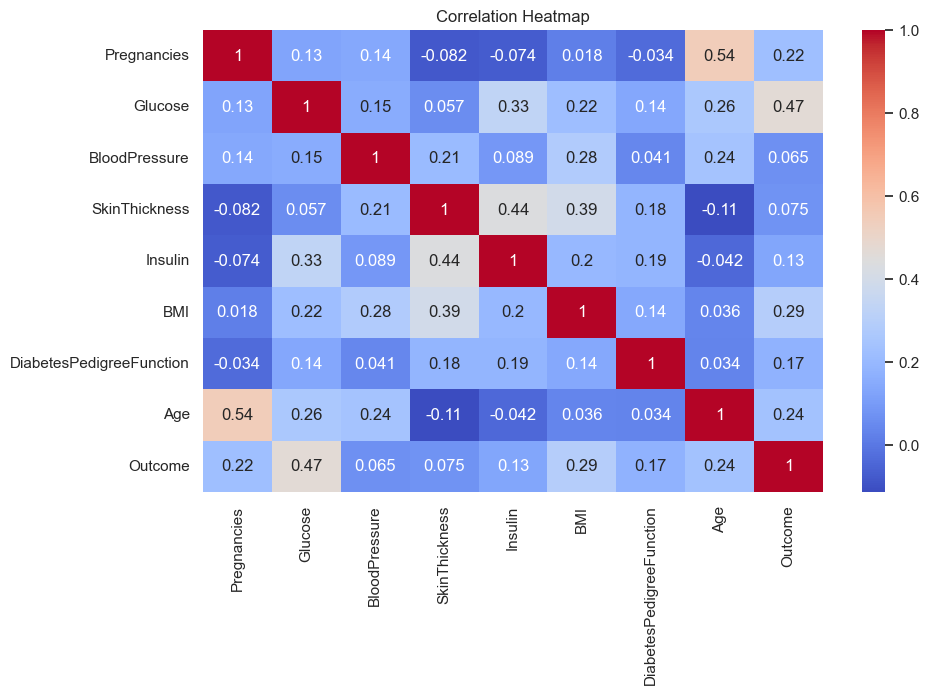

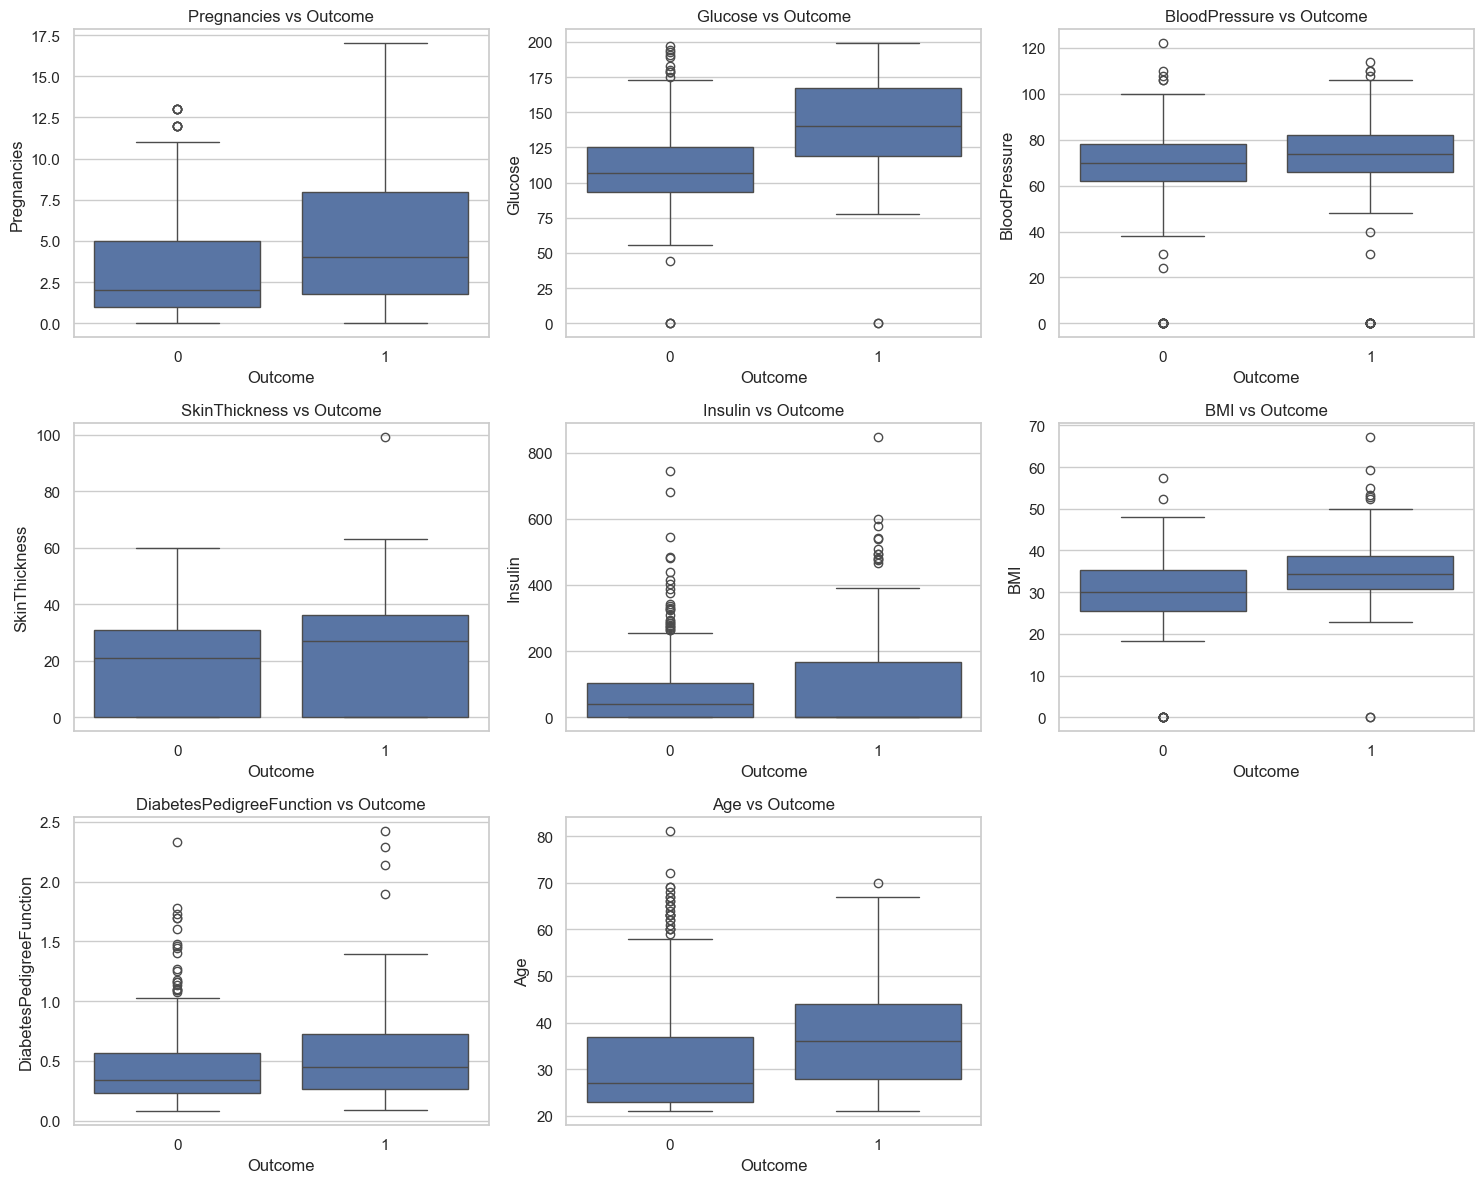

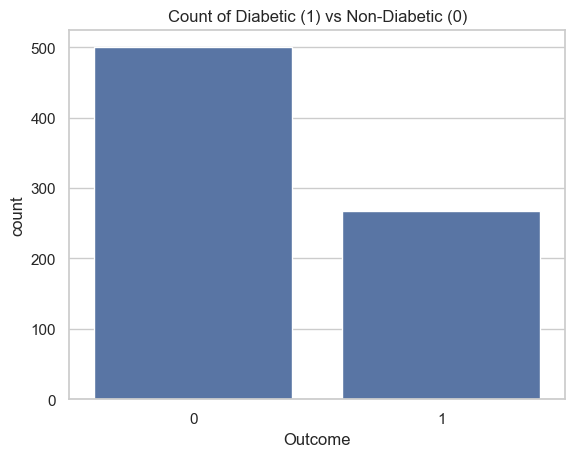

In [24]:
sns.set(style='whitegrid')

# 1. Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


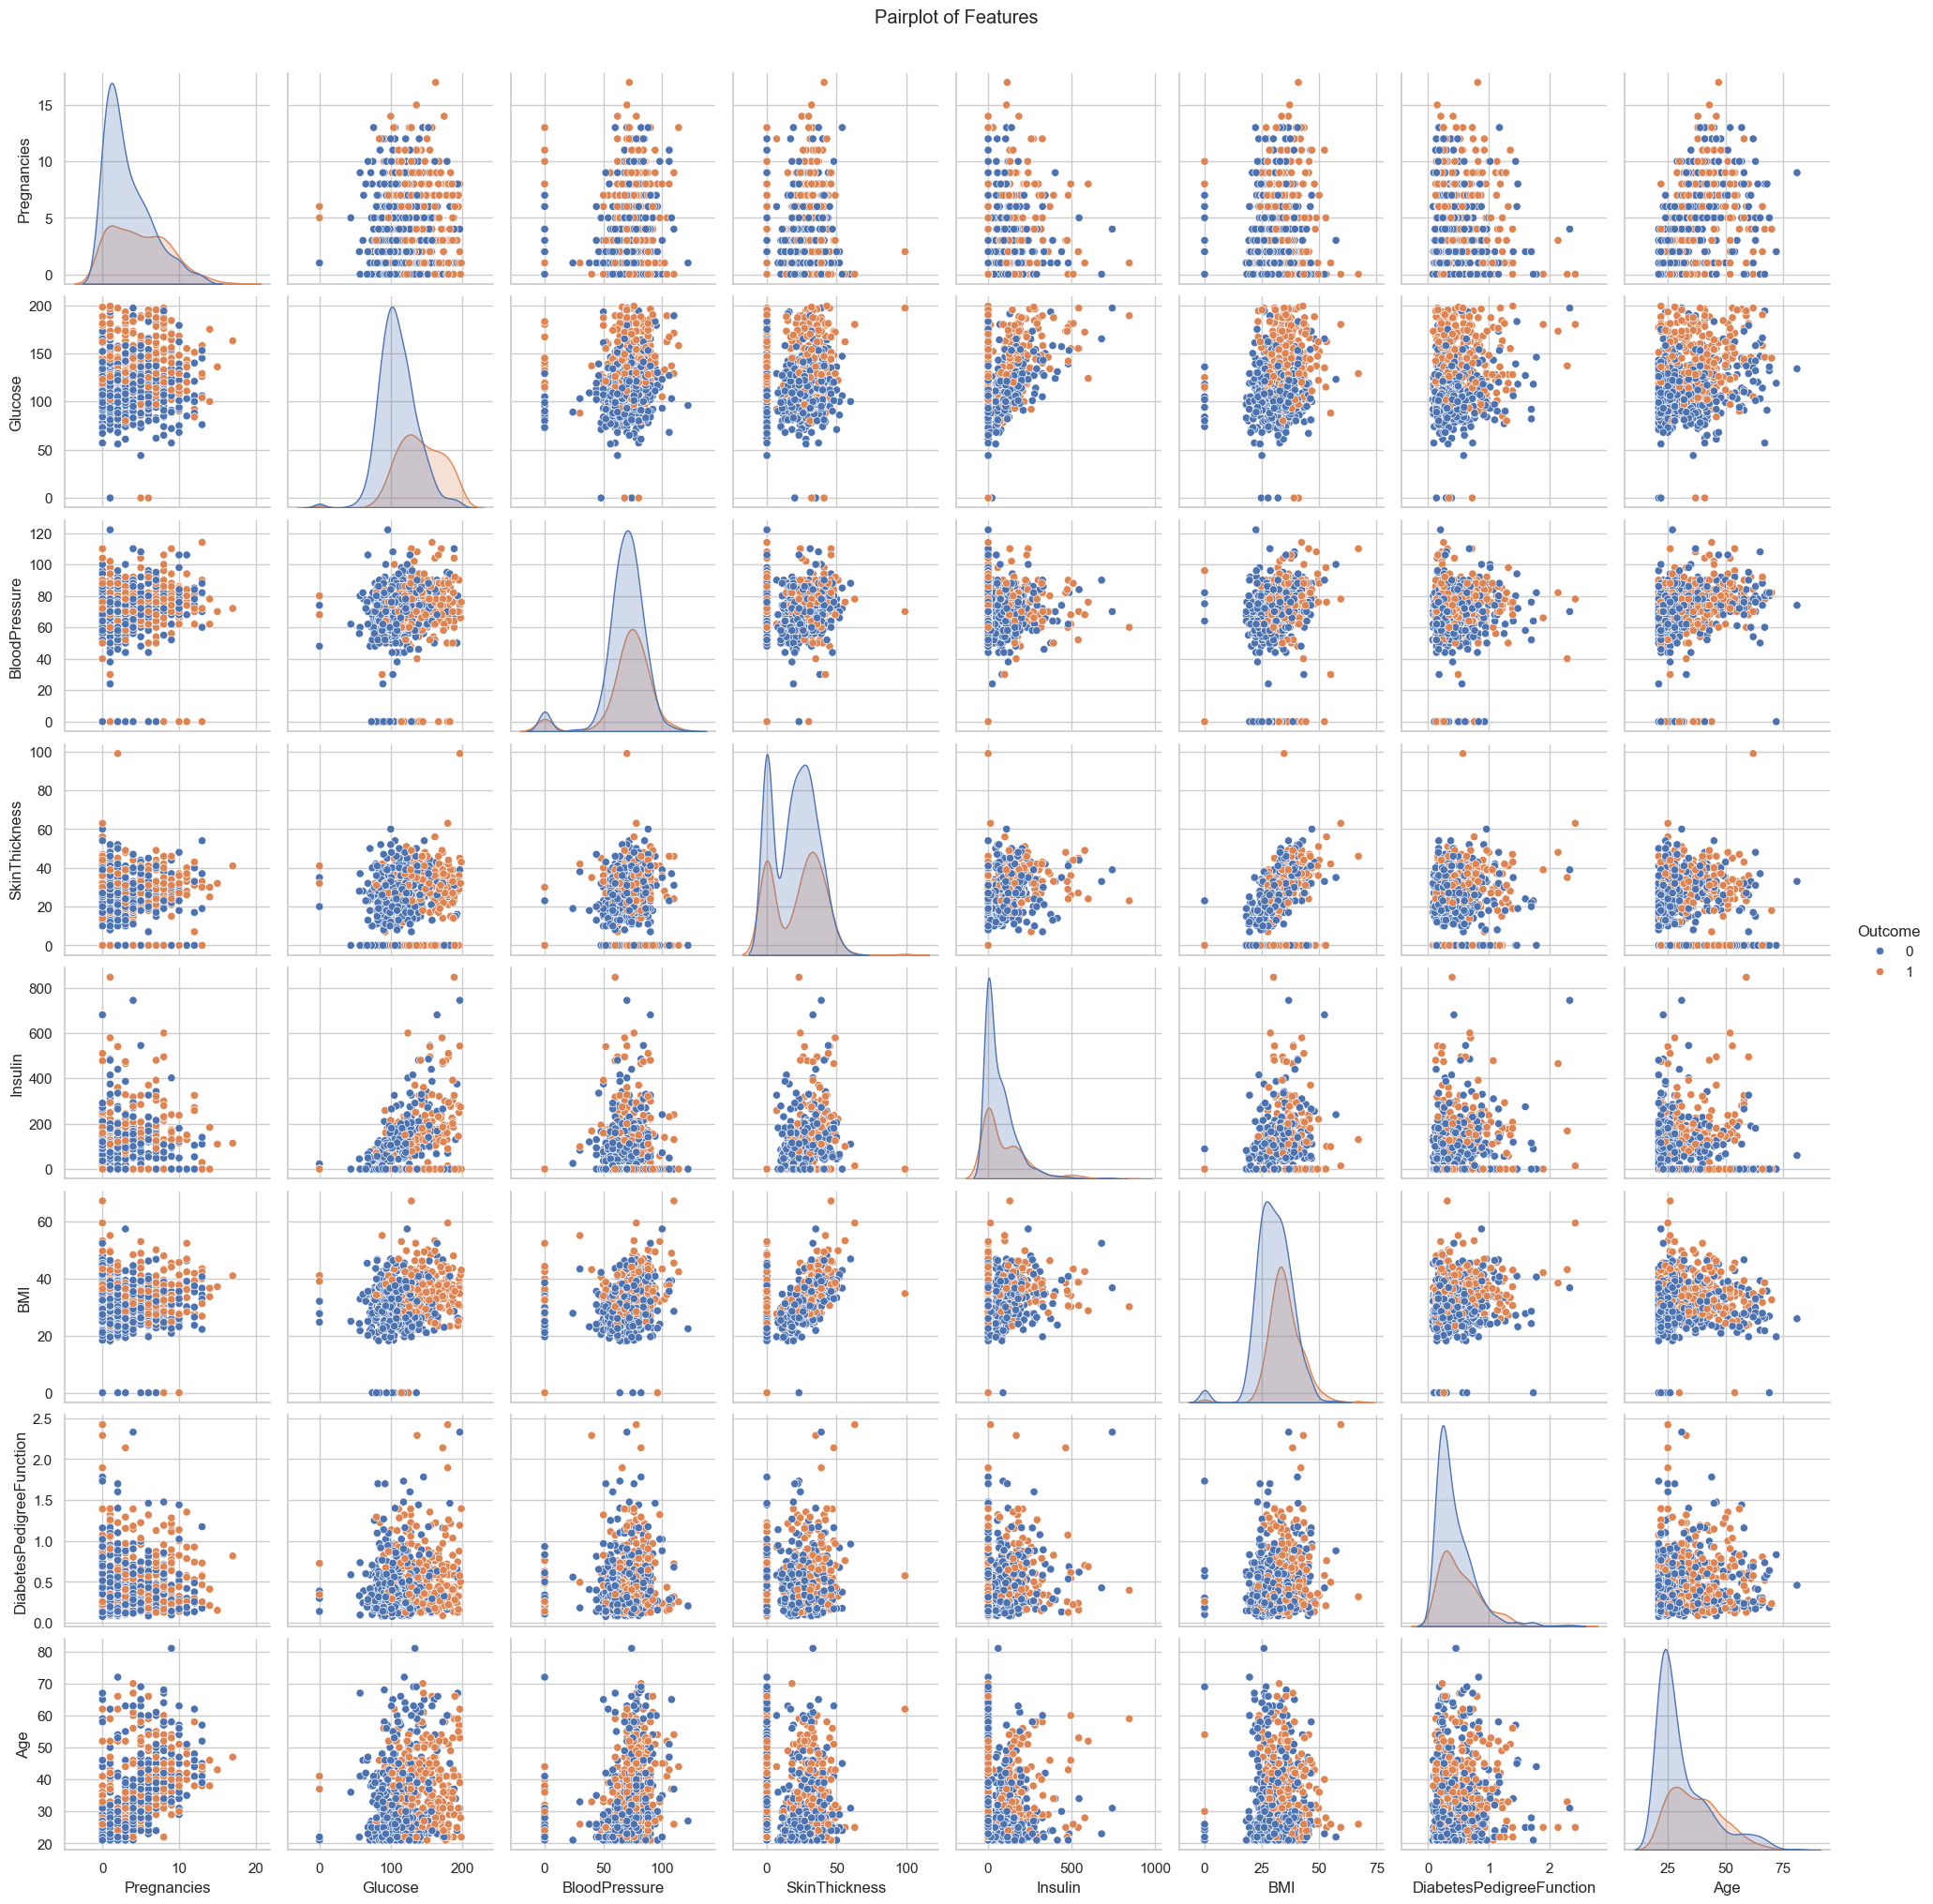

In [25]:
# 2. Pairplot
sns.pairplot(dataset, hue='Outcome')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

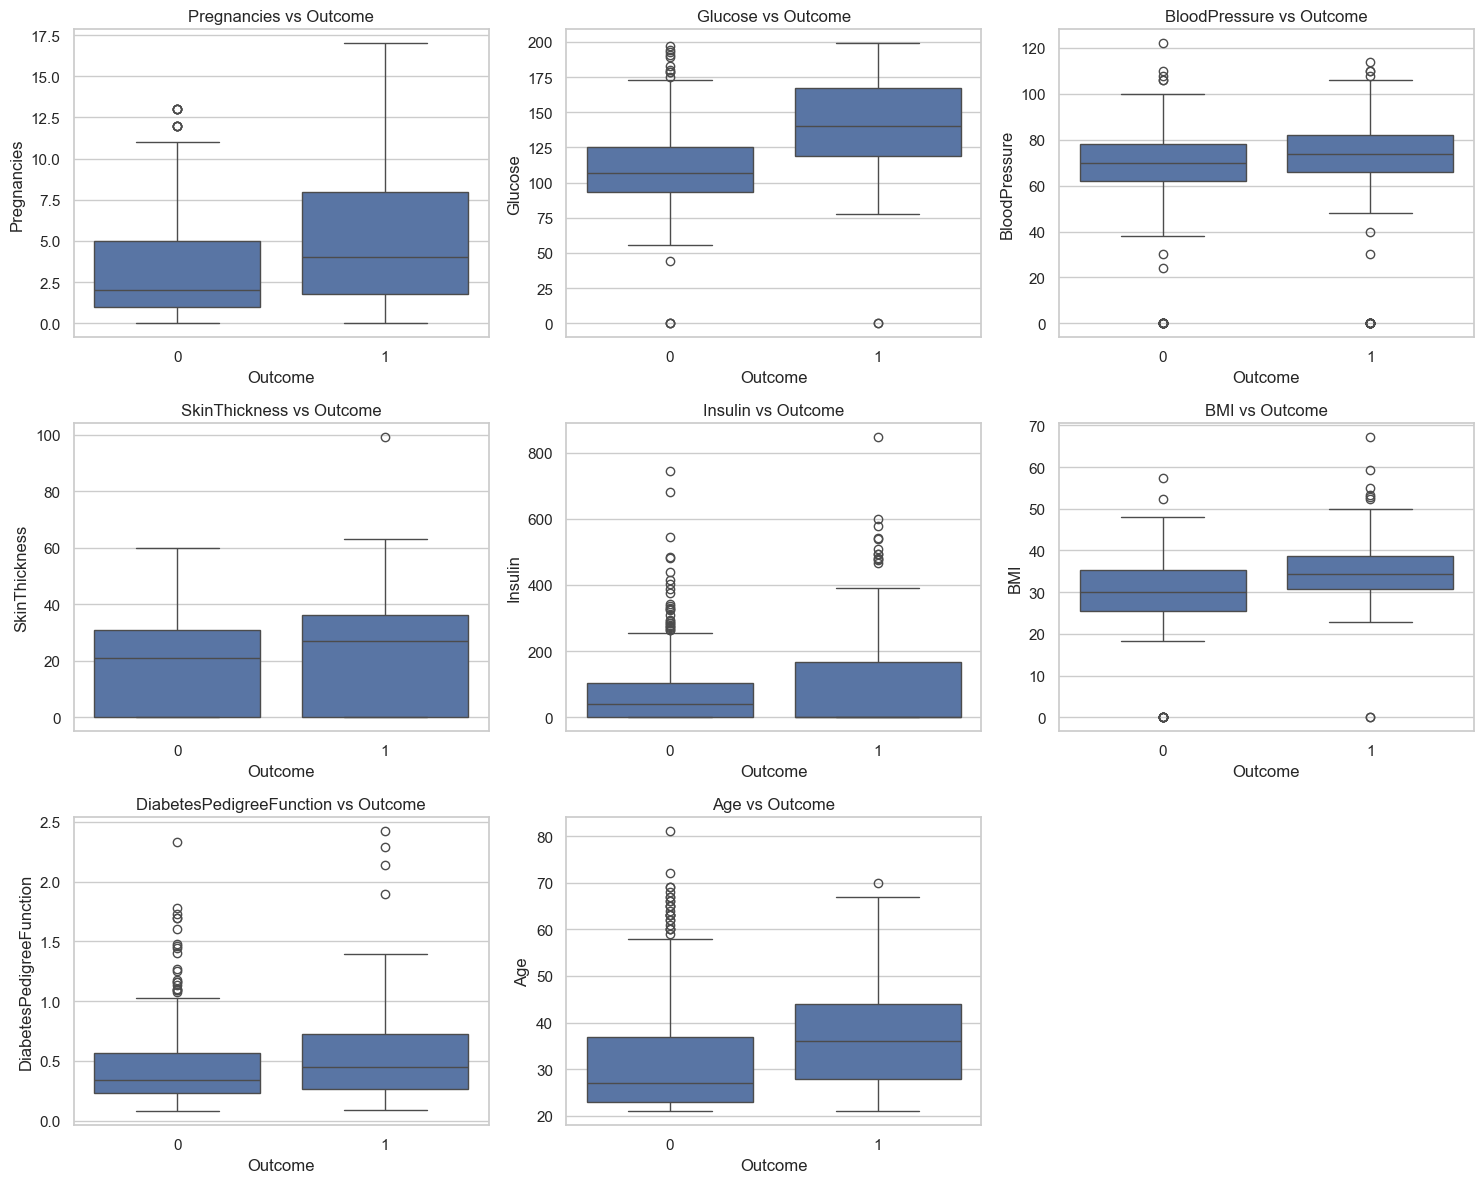

In [26]:
# 3. Boxplots to see distribution by Outcome
features = dataset.columns[:-1]
plt.figure(figsize=(15, 12))
for idx, col in enumerate(features):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(x='Outcome', y=col, data=dataset)
    plt.title(f'{col} vs Outcome')
plt.tight_layout()
plt.show()

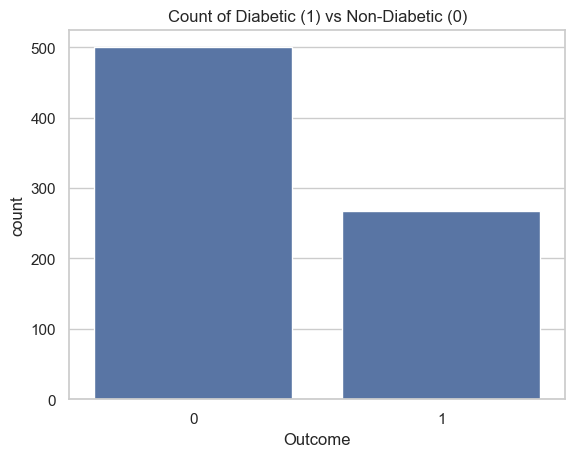

In [27]:
# 4. Countplot for Outcome
sns.countplot(x='Outcome', data=dataset)
plt.title('Count of Diabetic (1) vs Non-Diabetic (0)')
plt.show()

In [6]:
X=dataset.drop(columns='Outcome',axis=1)
Y=dataset['Outcome']

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)

,copy,True
,with_mean,True
,with_std,True


In [10]:
standard_data=sc.transform(X)
standard_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [11]:
X=standard_data

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2,stratify=Y)

In [13]:
from sklearn.svm import SVC 
classifier=SVC(kernel='linear')
classifier.fit(X_train,Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
X_train_pred=classifier.predict(X_train)
from sklearn.metrics import accuracy_score
ac=accuracy_score(X_train_pred,Y_train)
ac


0.7881944444444444

In [15]:
X_test_pred=classifier.predict(X_test)
ac_test=accuracy_score(X_test_pred,Y_test)
ac_test

0.765625

In [16]:

input_data = (116, 74, 0, 0, 25.6, 0.201, 30, 0)
input_array = np.asarray(input_data).reshape(1, -1)


std_input = sc.transform(input_array)

prediction = classifier.predict(std_input)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
prediction
std_input

array([[33.30625816, -1.46766496, -3.57259724, -1.28821221, -0.47060844,
        -4.0349631 , 89.17843789, -2.82839225]])

In [18]:
if prediction[0] == 1:
    print("The person is diabetic.")
else:
    print("The person is not diabetic.") 

The person is diabetic.


In [21]:
# Save the scaler
joblib.dump(sc, 'scaler.sav')

# Save the model
joblib.dump(classifier, 'svm_model.sav')

['svm_model.sav']